In [1]:
from pathlib import Path
import sys

parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
#from utils import read_txn_data, preprocess_txn_data, compute_lob_features, create_lob_dataset, merge_txn_and_lob
import torch.nn.functional as F
import warnings
from sklearn.metrics import mean_squared_error
#import mae function
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

In [4]:
# dataread and features
from data.preprocess import read_txn_data , preprocess_txn_data, compute_lob_features, \
    create_lob_dataset, merge_txn_and_lob

# desesonalisation
from models.deseasonalization import deses

# Parameters

In [5]:
def set_neurips_style():
    plt.rcParams.update({
        "font.family":       "sans-serif",
        "font.size":         12,
        "axes.spines.top":   False,
        "axes.spines.right": False,
        "axes.grid":         True,
        "grid.linestyle":    ":",
        "grid.alpha":        0.5,
        "figure.dpi":        120,
        "legend.frameon":    False,
    })

set_neurips_style()

In [6]:
config = {
    "data_split": {
        "train_size": 0.7,
        "validation_size": 0.1,
        "test_size": 0.2
    },
    "model_params": {
        "learning_rate": 0.001,
        "batch_size": 10000,
        "epochs": 10
        ,
    }
}

# Check GPU 

In [7]:
import torch

if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))
    print(f"Allocated: {torch.cuda.memory_allocated(0) / 1024**2:.2f} MB")
    print(f"Reserved : {torch.cuda.memory_reserved(0) / 1024**2:.2f} MB")
    print(f"Max Alloc: {torch.cuda.max_memory_allocated(0) / 1024**2:.2f} MB")
    print(f"Max Rsvd : {torch.cuda.max_memory_reserved(0) / 1024**2:.2f} MB")
else:
    print("CUDA not available.")


Device name: NVIDIA GeForce RTX 3050 Ti Laptop GPU
Allocated: 0.00 MB
Reserved : 0.00 MB
Max Alloc: 0.00 MB
Max Rsvd : 0.00 MB


In [8]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1 Min 

#### 1.1 Load Data

In [9]:
freq='1min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)
df_des, _ = deses(df_raw, train_size=config["data_split"]["train_size"])

trx Data loaded successfully.
preprocessed lob Data loaded successfully.


#### 1.2 TME 

\begin{array}{c|c|c|c|c}
\hline \text { BITSTAMP MARKET } & \text { RMSE } \downarrow & \text { MAE } \downarrow & \text { NNLL } \downarrow & \text { IW } \downarrow \\
\hline \text { ARMA(3,3)-GARCH(1,1) } & 14.587 & 7.688 & \mathbf{1 . 7 1 9} & 97.618 \\
\text { ARMAX(3,3)-GARCH(1,1) } & 14.292 & 7.487 & 1.719 & 93.943 \\
\text { GBM } & 11.740 & \mathbf{3 . 5 1 5} & \text { NA } & \text { NA } \\
\text { TME } & \mathbf{1 1 . 3 7 8} & 4.299 & 1.720 & \mathbf{1 0 . 2 9 5} \\
\hline
\end{array}

trx Data loaded successfully.
preprocessed lob Data loaded successfully.
ep01  train 6.7216  val 5.6288
ep02  train 5.6882  val 5.3683
ep03  train 5.5637  val 7.9523
ep04  train 5.7840  val 5.6030
ep05  train 5.5476  val 5.3905
ep06  train 5.3530  val 5.1331
ep07  train 4.9612  val 4.4177
ep08  train 3.8922  val 4.4961
ep09  train 4.6369  val 4.0188
ep10  train 11.3830  val 12.6748
Metric     |      Value
-----------------------
RMSE         |      12.40
MAE           |       3.85
R²             |    -0.1068
MAPE (%)  |      60.88
Coverage  |        0.0 %
IW             |       0.00
NNLL         | 12524739332.4170


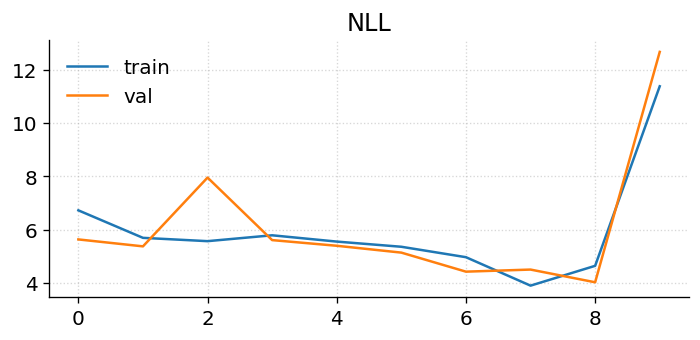

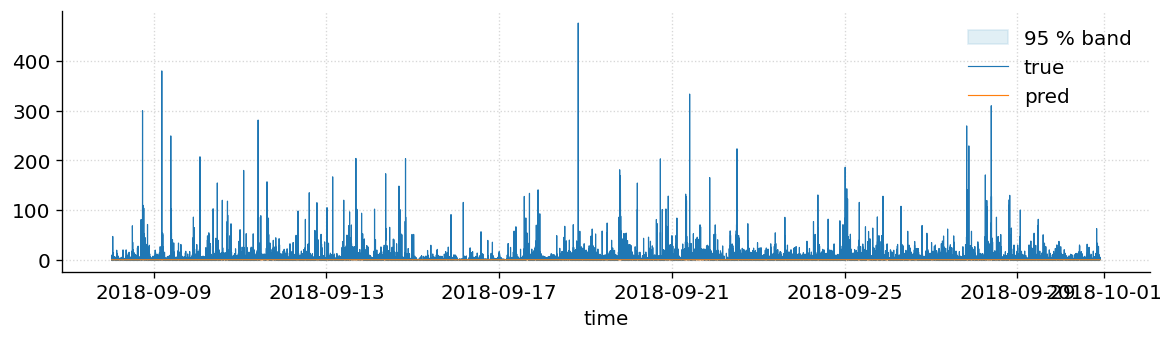

In [15]:
freq='1min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)
df_des, _ = deses(df_raw, train_size=config["data_split"]["train_size"])
from models.tme import TME
tme = TME(df_des, config)   # config is the dict you already have
tme.train()                 # prints epoch-wise NLL
y_true,y_pred=tme.evaluate()              # metrics + two plots

# 5 Min

#### 1.1 Load Data

In [11]:
freq='5min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)
df_des, _ = deses(df_raw, train_size=config["data_split"]["train_size"])

trx Data loaded successfully.
preprocessed lob Data loaded successfully.


#### 1.2 TME 

\begin{array}{|c|c|c|c|c|}
\hline \text { BITSTAMP MARKET } & \text { RMSE } \downarrow & \text { MAE } \downarrow & \text { NNLL } \downarrow & \text { IW } \downarrow \\
\hline \text { ARMA(5,4)-GARCH(1,1) } & 38.300 & 17.606 & \mathbf{3 . 7 3 2} & 34.797 \\
\text { ARMAX(5,4)-GARCH(1,1) } & 40.273 & 18.887 & 3.766 & 38.250 \\
\text { GBM } & 39.196 & \mathbf{1 4 . 7 1 4} & \text { NA } & \text { NA } \\
\text { TME } & \mathbf{3 8 . 2 2 3} & 17.287 & 3.765 & \mathbf{2 9 . 1 4 8} \\
\hline
\end{array}

ep01  train 2.5125  val 2.9392
ep02  train 2.2019  val 2.4815
ep03  train 1.9907  val 2.2240
ep04  train 1.9308  val 2.1282
ep05  train 1.9203  val 2.1072
ep06  train 1.9284  val 2.1032
ep07  train 1.9323  val 2.1061
ep08  train 1.9396  val 2.0994
ep09  train 1.9292  val 2.0927
ep10  train 1.9160  val 2.0884
Metric     |      Value
-----------------------
RMSE         |      35.95
MAE           |      18.14
R²             |    -0.0363
MAPE (%)  |     445.20
Coverage  |       96.4 %
IW             |     129.74
NNLL         |     2.5119


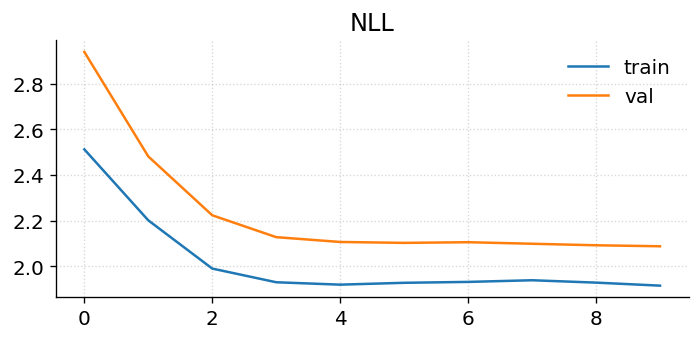

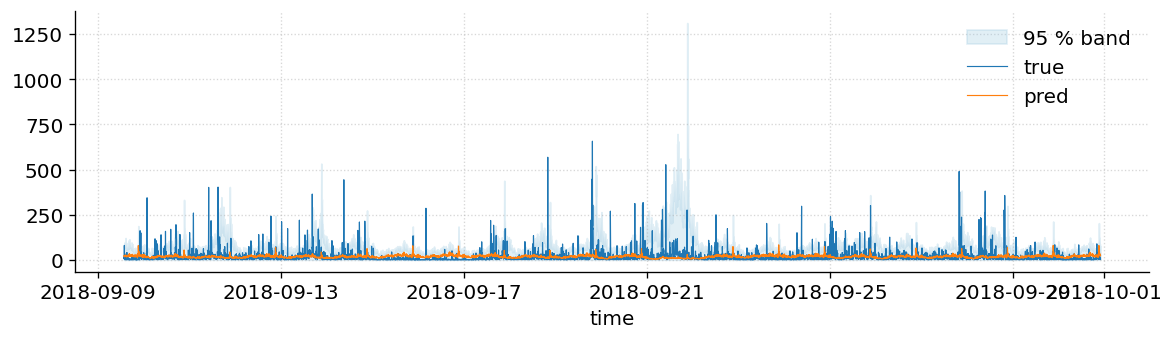

In [12]:
from models.tme import TME
tme = TME(df_des, config)   # config is the dict you already have
tme.train()                 # prints epoch-wise NLL
y_true,y_pred=tme.evaluate()              # metrics + two plots

# 10 Min

#### 1.1 Load Data

In [13]:
freq='10min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df_raw = merge_txn_and_lob(trx_df, lob_df)
df_des, _ = deses(df_raw, train_size=config["data_split"]["train_size"])

trx Data loaded successfully.
preprocessed lob Data loaded successfully.


#### 1.2 TME 

\begin{array}{|c|c|c|c|c|}
\hline \text { BITSTAMP MARKET } & \text { RMSE } \downarrow & \text { MAE } \downarrow & \text { NNLL } \downarrow & \text { IW } \downarrow \\
\hline \text { ARMA(3,2)-GARCH(1,1) } & 66.486 & 31.942 & \mathbf{4 . 4 5 2} & 51.228 \\
\text { ARMAX(3,2)-GARCH(1,1) } & 68.067 & 32.795 & 4.457 & 52.780 \\
\text { GBM } & 67.128 & \mathbf{2 7 . 7 1 9} & \text { NA } & \text { NA } \\
\text { TME } & \mathbf{6 6 . 2 3 4} & 31.460 & 4.507 & \mathbf{4 9 . 9 7 2} \\
\hline
\end{array}

ep01  train 2.0208  val 1.9923
ep02  train 1.7639  val 1.8873
ep03  train 1.7064  val 1.8090
ep04  train 1.6938  val 1.7648
ep05  train 1.6803  val 1.7391
ep06  train 1.7263  val 1.7196
ep07  train 1.6768  val 1.7144
ep08  train 1.6570  val 1.7355
ep09  train 1.6271  val 1.7783
ep10  train 1.6430  val 1.8228
Metric     |      Value
-----------------------
RMSE         |      59.37
MAE           |      36.36
R²             |    -0.0433
MAPE (%)  |     476.93
Coverage  |       80.0 %
IW             |      91.05
NNLL         |     2.3939


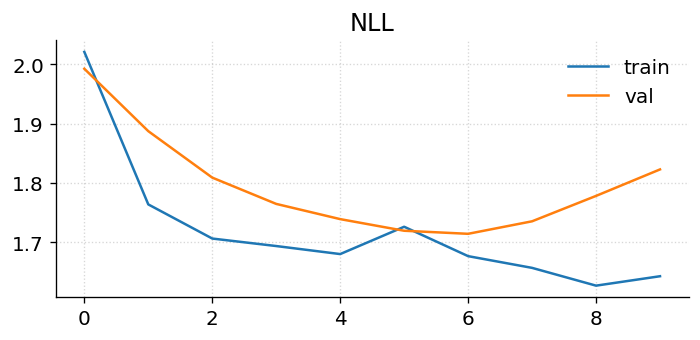

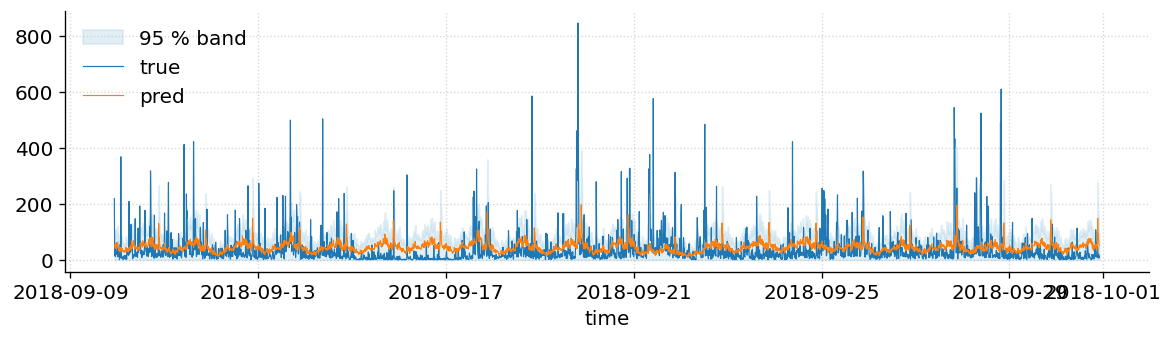

In [14]:
from models.tme import TME
tme = TME(df_des, config)   # config is the dict you already have
tme.train()                 # prints epoch-wise NLL
y_true,y_pred=tme.evaluate()              # metrics + two plots